In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.1     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [8]:
coal = read_csv('http://594442.youcanlearnit.net/coal.csv', skip = 2)

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  .default = col_character()
)
See spec(...) for full column specifications.


In [11]:
head(coal)

X1,1980,1981,1982,1983,1984,1985,1986,1987,1988,⋯,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
North America,16.45179,16.98772,16.47546,17.12407,18.4267,18.81819,18.52559,19.43781,20.40363,⋯,24.55583,23.62705,23.69876,24.17788,24.36024,24.6876,24.32174,24.54746,24.11993,21.14803
Bermuda,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Canada,0.96156,0.99047,1.05584,1.11653,1.23682,1.20679,1.12583,1.25072,1.35809,⋯,1.61651,1.35444,1.36876,1.38766,1.43684,1.44948,1.42135,1.38369,1.37388,1.14314
Greenland,0.00005,0.00005,0.00003,0.00003,0.00003,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Mexico,0.10239,0.10562,0.11967,0.12869,0.13071,0.14646,0.15609,0.17001,0.15967,⋯,0.29444,0.32908,0.36525,0.41878,0.31944,0.39739,0.39244,0.38911,0.32008,0.3365
Saint Pierre and Miquelon,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [12]:
colnames(coal)[1] = 'regions'

In [18]:
coal_long = gather(coal, 'year', 'coal_consumption', -regions)

In [20]:
head(coal_long)

regions,year,coal_consumption
North America,1980,16.45179
Bermuda,1980,0
Canada,1980,0.96156
Greenland,1980,0.00005
Mexico,1980,0.10239
Saint Pierre and Miquelon,1980,0


In [23]:
coal_long$year = as.integer(coal_long$year)
coal_long$coal_consumption = as.numeric(coal_long$coal_consumption) 

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

In [24]:
glimpse(coal_long)

Observations: 6,960
Variables: 3
$ regions          <chr> "North America", "Bermuda", "Canada", "Greenland",...
$ year             <int> 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 19...
$ coal_consumption <dbl> 16.45179, 0.00000, 0.96156, 0.00005, 0.10239, 0.00...


In [25]:
summary(coal_long)

   regions               year      coal_consumption  
 Length:6960        Min.   :1980   Min.   : -0.0002  
 Class :character   1st Qu.:1987   1st Qu.:  0.0000  
 Mode  :character   Median :1994   Median :  0.0002  
                    Mean   :1994   Mean   :  1.3256  
                    3rd Qu.:2002   3rd Qu.:  0.0773  
                    Max.   :2009   Max.   :138.8298  
                                   NA's   :517       

In [28]:
noncountries = c("North America", "Central & South America", "Antarctica", "Europe", "Eurasia", "Middle East", 
                "Africa", "Asia & Oceania", "World")

In [32]:
matches = which(!is.na(match(coal_long$regions, noncountries)))

In [34]:
coal_country = coal_long[-matches,]

In [35]:
coal_regions = coal_long[matches,]

In [38]:
unique(coal_country$regions)

[1] "Bermuda"                           "Canada"                           
  [3] "Greenland"                         "Mexico"                           
  [5] "Saint Pierre and Miquelon"         "United States"                    
  [7] "Antigua and Barbuda"               "Argentina"                        
  [9] "Aruba"                             "Bahamas, The"                     
 [11] "Barbados"                          "Belize"                           
 [13] "Bolivia"                           "Brazil"                           
 [15] "Cayman Islands"                    "Chile"                            
 [17] "Colombia"                          "Costa Rica"                       
 [19] "Cuba"                              "Dominica"                         
 [21] "Dominican Republic"                "Ecuador"                          
 [23] "El Salvador"                       "Falkland Islands (Islas Malvinas)"
 [25] "French Guiana"                     "Grenada"                          
 [27] "Guadeloupe"                        "Guatemala"                        
 [29] "Guyana"                            "Haiti"                            
 [31] "Honduras"                          "Jamaica"                          
 [33] "Martinique"                        "Montserrat"                       
 [35] "Netherlands Antilles"              "Nicaragua"                        
 [37] "Panama"                            "Paraguay"                         
 [39] "Peru"                              "Puerto Rico"                      
 [41] "Saint Kitts and Nevis"             "Saint Lucia"                      
 [43] "Saint Vincent/Grenadines"          "Suriname"                         
 [45] "Trinidad and Tobago"               "Turks and Caicos Islands"         
 [47] "Uruguay"                           "Venezuela"                        
 [49] "Virgin Islands,  U.S."             "Virgin Islands, British"          
 [51] "Albania"                           "Austria"                          
 [53] "Belgium"                           "Bosnia and Herzegovina"           
 [55] "Bulgaria"                          "Croatia"                          
 [57] "Cyprus"                            "Czech Republic"                   
 [59] "Denmark"                           "Faroe Islands"                    
 [61] "Finland"                           "Former Czechoslovakia"            
 [63] "Former Serbia and Montenegro"      "Former Yugoslavia"                
 [65] "France"                            "Germany"                          
 [67] "Germany, East"                     "Germany, West"                    
 [69] "Gibraltar"                         "Greece"                           
 [71] "Hungary"                           "Iceland"                          
 [73] "Ireland"                           "Italy"                            
 [75] "Luxembourg"                        "Macedonia"                        
 [77] "Malta"                             "Montenegro"                       
 [79] "Netherlands"                       "Norway"                           
 [81] "Poland"                            "Portugal"                         
 [83] "Romania"                           "Serbia"                           
 [85] "Slovakia"                          "Slovenia"                         
 [87] "Spain"                             "Sweden"                           
 [89] "Switzerland"                       "Turkey"                           
 [91] "United Kingdom"                    "Armenia"                          
 [93] "Azerbaijan"                        "Belarus"                          
 [95] "Estonia"                           "Former U.S.S.R."                  
 [97] "Georgia"                           "Kazakhstan"                       
 [99] "Kyrgyzstan"                        "Latvia"                           
[101] "Lithuania"                         "Moldova"                          
[103] "Russia"          

In [39]:
unique(coal_regions$regions)

[1] "North America"           "Central & South America"
[3] "Antarctica"              "Europe"                 
[5] "Eurasia"                 "Middle East"            
[7] "Africa"                  "Asia & Oceania"         
[9] "World"

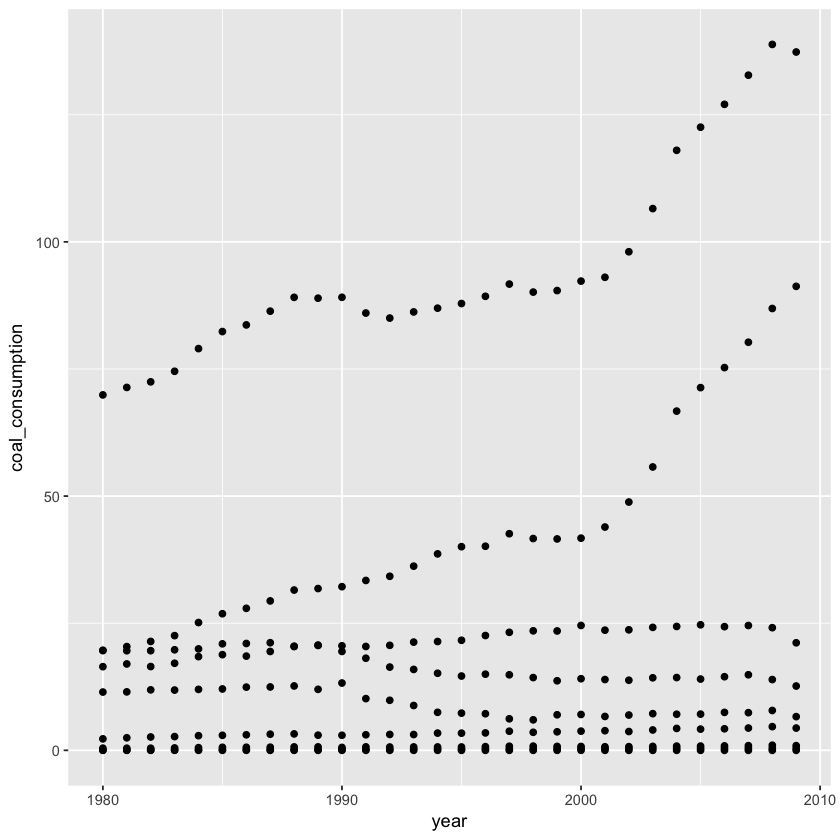

In [41]:
ggplot(data=coal_regions, mapping=aes(x=year, y=coal_consumption)) + geom_point()

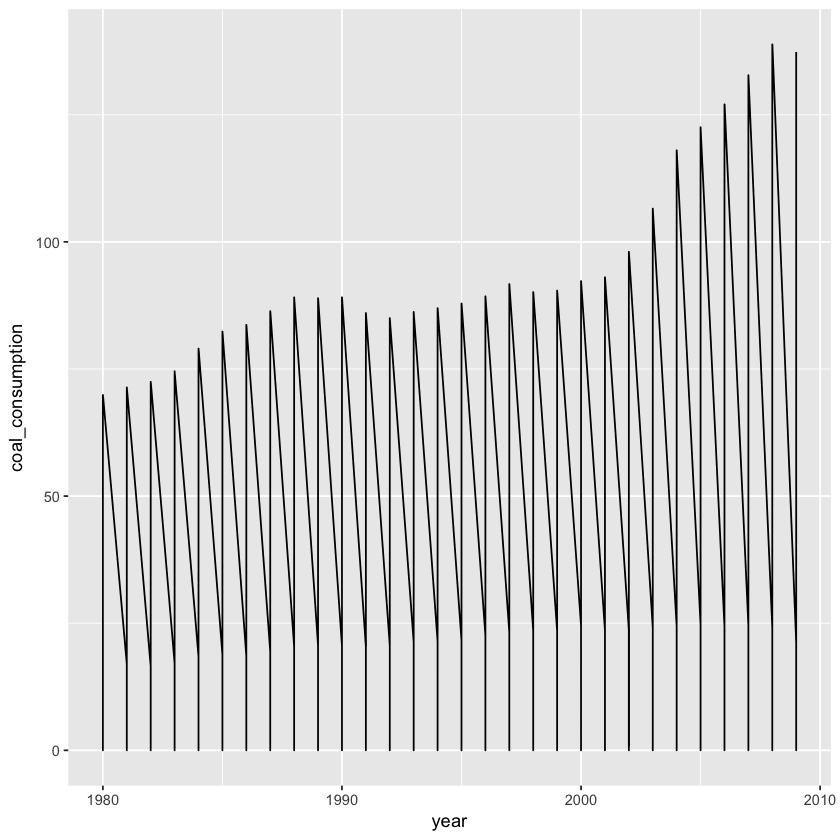

In [42]:
ggplot(data=coal_regions, mapping=aes(x=year, y=coal_consumption)) + geom_line()

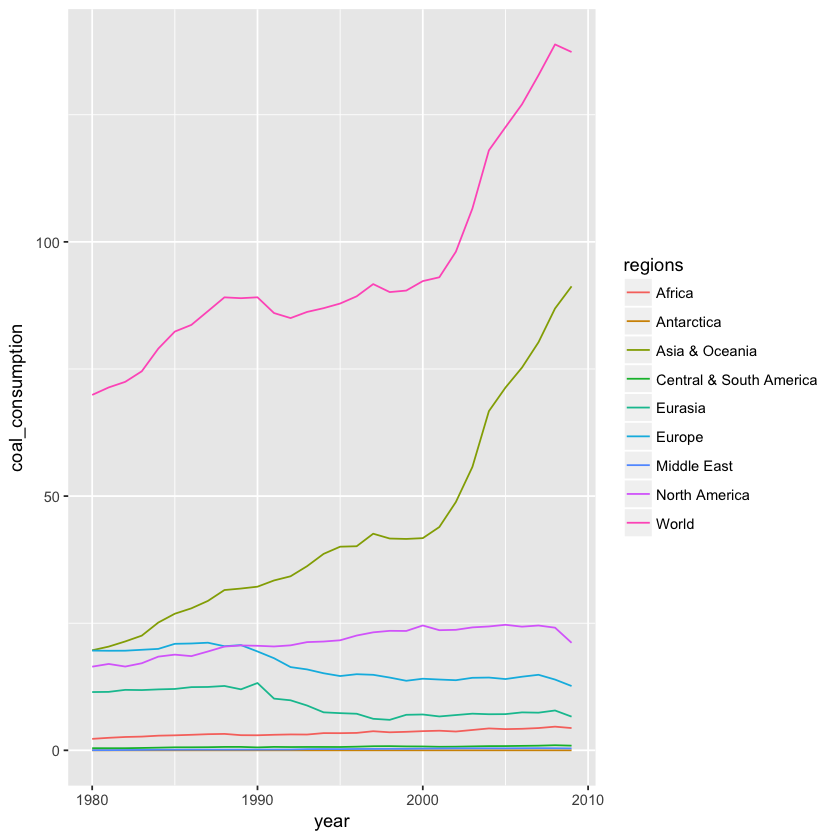

In [44]:
ggplot(data=coal_regions, mapping=aes(x=year, y=coal_consumption)) + geom_line(mapping=aes(color=regions))